<ipython-input-39-70457e0d0a3c>:60: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  U[freedofs,:] = np.linalg.lstsq(K[freedofs[:,None],freedofs],  F[freedofs,:])[0]


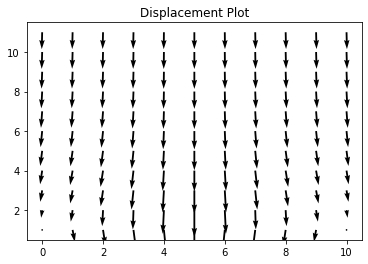

"\nc = np.zeros([nely+1,nelx+1],dtype=float)         \n\n# Multiply K by U to get forces\n# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.quiver.html\nfor i in range(nely+1):\n    for j in range(nelx+1): \n        c[i,j] = Ure[i,j,:].dot(Ure[i,j,:])\n\n#colorsa = cm.coolwarm(c/np.max(c))\n\ncolorsa = cm.coolwarm(strain/np.max(strain))\n\nfor x, y in [(x,y) for x in range(nely+1) for y in range(nelx+1)]:\n    plt.scatter(x, y, color=colorsa[x,y,:])\n\n#plt.plot(Y, X, 'o', color=colorsa);\n"

In [39]:
# 2D Stress field 

# With contours 

# Creation of boundary conditions 

import csv
import numpy as np 
import math 
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
from matplotlib import colors
from matplotlib import cm



def lk():
    E=1
    nu=0.3
    k=np.array([1/2-nu/6,1/8+nu/8,-1/4-nu/12,-1/8+3*nu/8,-1/4+nu/12,-1/8-nu/8,nu/6,1/8-3*nu/8])
    KE = E/(1-nu**2)*np.array([ [k[0], k[1], k[2], k[3], k[4], k[5], k[6], k[7]],
    [k[1], k[0], k[7], k[6], k[5], k[4], k[3], k[2]],
    [k[2], k[7], k[0], k[5], k[6], k[3], k[4], k[1]],
    [k[3], k[6], k[5], k[0], k[7], k[2], k[1], k[4]],
    [k[4], k[5], k[6], k[7], k[0], k[1], k[2], k[3]],
    [k[5], k[4], k[3], k[2], k[1], k[0], k[7], k[6]],
    [k[6], k[3], k[4], k[1], k[2], k[7], k[0], k[5]],
    [k[7], k[2], k[1], k[4], k[3], k[6], k[5], k[0]] ])
    return (KE)

def FE(nelx,nely,x): 
    KE=lk()
    K = np.zeros( (2*(nelx+1)*(nely+1), 2*(nelx+1)*(nely+1)),dtype=float)
    K = csr_matrix(K).todense()
    
    
    F = np.zeros((2*(nely+1)*(nelx+1), 1), dtype=float)
    
    F = csr_matrix(F).todense()
    U = np.zeros((2*(nely+1)*(nelx+1),1), dtype=float)

    for elx in range(nelx):
        for ely in range(nely):
            n1=(nely+1)*(elx)+ely+1
            n2=(nely+1)*(elx+1)+ely+1
            edof = np.array([2*n1-2, 2*n1-1, 2*n2-2, 2*n2-1, 2*n2, 2*n2+1, 2*n1, 2*n1+1])

            K[edof[:,None], edof] = K[edof[:,None], edof]  + x[ely,elx]*KE 

    # FORCE IS HERE
    F[2*(int(nelx/2+1))*(nely+1)-1]= -1
    alldofs  =  list(np.arange(2*(nely+1)*(nelx+1)))
    #fixeddofs = list( np.arange(2*(nely+1)))
    fixeddofs =[2*(nely+1)-2,2*(nely+1)-1,2*(nely+1)*(nelx+1)-2,2*(nely+1)*(nelx+1)-1]
    #fixeddofs =[0,1,2*(nely)*(nelx+1),2*(nely)*(nelx+1)+1]
    freedofs = np.array((list(set(alldofs) - set(fixeddofs))))

    U[freedofs,:] = np.linalg.lstsq(K[freedofs[:,None],freedofs],  F[freedofs,:])[0]
    U[fixeddofs,:]= 0 

    return U, K 



# Actual drive  of the program 
nely = 10
nelx = 10


# Initialize 
x=np.ones([nely,nelx],dtype=float) 


#xold = x.copy() 
U, K = FE(nelx, nely,x)


# The array of nelx and nely 
X,Y = np.meshgrid(np.arange(nely+1,0,-1),np.arange(0, nelx+1))
Ure = np.reshape(U,(nely+1,nelx+1,2))
U1 = Ure[:,:,0]
U2 = Ure[:,:,1]

strain = 1/2*(U1+U2)


plt.figure()
plt.title('Displacement Plot')
Q = plt.quiver(Y, X, U1, U2, units='width')
plt.show()

'''
c = np.zeros([nely+1,nelx+1],dtype=float)         

# Multiply K by U to get forces
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.quiver.html
for i in range(nely+1):
    for j in range(nelx+1): 
        c[i,j] = Ure[i,j,:].dot(Ure[i,j,:])

#colorsa = cm.coolwarm(c/np.max(c))

colorsa = cm.coolwarm(strain/np.max(strain))

for x, y in [(x,y) for x in range(nely+1) for y in range(nelx+1)]:
    plt.scatter(x, y, color=colorsa[x,y,:])

#plt.plot(Y, X, 'o', color=colorsa);
'''

In [65]:
print(np.average(c/np.max(c)))
print(np.max((c/np.max(c))))


0.10107548508214613
1.0
